In [33]:
# import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# read in the data
df = pd.read_csv("olympics_08_medalists.csv")

# view first observations of dataframe
df.head()

,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
0,Aaron Armstrong,NaN,NaN,gold,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Peirsol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdullo Tangriev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abeer Abdelrahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bronze,NaN,NaN,NaN
4,Abhinav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning
As we can see above, this dataframe is not organized in a tidy manner. Each instance of a sport associated with a gender is a separate column. This means that not only do we have values as column headers (e.g. "male" and "female", which are values of the variable "gender"), but we also have two variables combined in a column (gender and sport).

It is important to clean and tidy up this dataframe so that it follows a stardard data structure with each variable in a column and each observation in a row. This will ensure that anyone can easily use this dataframe for aggregations and analyses. In addition, a tidy dataframe will be compatible with most tools used for data analysis.

### Step 1: Convert dataframe from wide to long format
- Transform this dataframe so that each instance of a sport associated with a gender is a value within a column for "sport".

In [ ]:
# create a copy of the original dataframe
df_medals = df.copy()

# reorganize dataframe so that each variable is in a separate column
df_medals = pd.melt(df_medals,
                    id_vars=["medalist_name"],
                    value_vars=df_medals.columns[1:],
                    var_name="sport",
                    value_name="medal")

# view first observations of dataframe
df_medals.head()

,medalist_name,sport,medal
0,Aaron Armstrong,male_archery,NaN
1,Aaron Peirsol,male_archery,NaN
2,Abdullo Tangriev,male_archery,NaN
3,Abeer Abdelrahman,male_archery,NaN
4,Abhinav,male_archery,NaN


As we can see above, the "sport" column still contains two variables: gender and sport. In addition, now we have several observations with null values.

### Step 2: Split column with multiple variables and clean null data
- Split the "sport" column into "gender" and "sport".
- Remove rows with null data.

In [31]:
# split sport column so that each variable within it has its own column
df_medals[["gender", "sport"]] = df_medals["sport"].str.split("_", expand = True)

# drop rows containing null data
df_medals = df_medals.dropna()

# view first observations of dataframe
df_medals.head()

,medalist_name,sport,medal,gender
177,Bair Badënov,archery,bronze,male
676,Ilario Di Buò,archery,silver,male
682,Im Dong-hyun,archery,gold,male
760,Jiang Lin,archery,bronze,male
920,Lee Chang-hwan,archery,gold,male


## Tidy Data Applications
Now that the dataframe is clean and in a tidy format, we can use it for several applications in analysis. Here, I will demonstrate a few possible uses for data visualization and aggregation.

([<matplotlib.axis.XTick at 0x15647a570>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

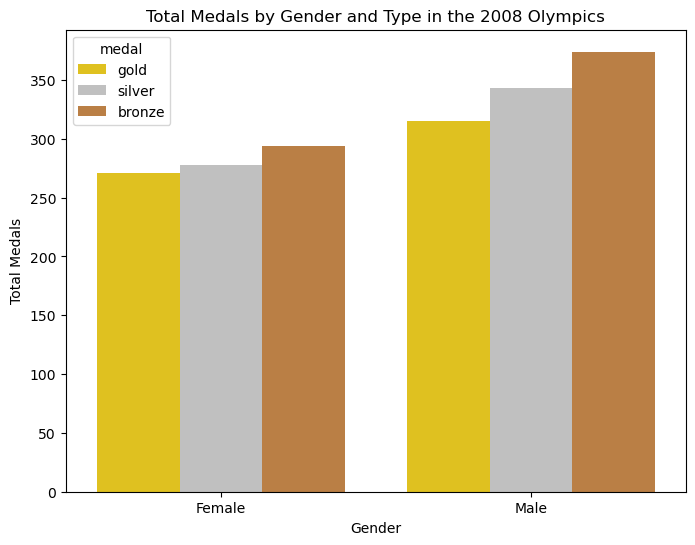

In [50]:
# aggregate data by gender and medal type
medal_counts = df_medals.groupby(["medal", "gender"]).size().reset_index(name="count")

# create a custom palette for medals
medal_palette = {
    "gold" : "#FFD700",
    "silver" : "#C0C0C0",
    "bronze" : "#CD7F32"
}

# create a grouped bar plot for medals grouped by gender
plt.figure(figsize=(8, 6))
sns.barplot(data=medal_counts,
            x="gender",
            y="count",
            hue="medal",
            hue_order=["gold", "silver", "bronze"],
            palette=medal_palette)

# customize plot labels and title
plt.title("Total Medals by Gender and Type in the 2008 Olympics")
plt.ylabel("Total Medals")
plt.xlabel("Gender")
plt.xticks(ticks=[0,1], labels=["Female", "Male"])
#plt.legend(title="Medal", labels=["Gold", "Silver", "Bronze"])